### James Bond Films

![Skyfall](skyfall_poster.jpg "Skyfall (2012)")

In this notebook we will analyze box office and budget of ***James Bond*** films. The information is based on the Wikipedia page https://en.wikipedia.org/wiki/List_of_James_Bond_films.

A couple of notes:

 - Budget expenditures are averaged where only range is given
 - The films in the data file are ordered by year of release
 - Two years have two filmes filmed, because they are produced by different companies. Their order within the year is arbitrary

#### Download the data

Here we are downloading the data about box office and budget results.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

films_df = pd.read_csv('bond_films.csv')
films_df.rename(inplace=True, columns={
    'Box office (Actual $)': 'box_office',
    'Box office (Adjusted $2005)': 'box_office_adj',
    'Budget (Actual $)': 'budget',
    'Budget (Adjusted $2005)': 'budget_adj'
})
films_df.index.rename('film_no', inplace=True)

films_df['net_income'] = films_df['box_office'] - films_df['budget']
films_df['net_income_adj'] = films_df['box_office_adj'] - films_df['budget_adj']

films_df

,Title,Year,Bond actor,box_office,box_office_adj,budget,budget_adj,net_income,net_income_adj
film_no,,,,,,,,,
0,Dr. No,1962,Sean Connery,59.5,448.8,1.1,7.0,58.4,441.8
1,From Russia with Love,1963,Sean Connery,78.9,543.8,2.0,12.6,76.9,531.2
2,Goldfinger,1964,Sean Connery,124.9,820.4,3.0,18.6,121.9,801.8
3,Thunderball,1965,Sean Connery,141.2,848.1,6.8,41.9,134.4,806.2
4,You Only Live Twice,1967,Sean Connery,111.6,514.2,10.3,59.9,101.3,454.3
5,Casino Royale,1967,David Niven,44.4,260.0,12.0,70.0,32.4,190.0
6,On Her Majesty's Secret Service,1969,George Lazenby,64.6,291.5,7.0,37.3,57.6,254.2
7,Diamonds Are Forever,1971,Sean Connery,116.0,442.5,7.2,34.7,108.8,407.8
8,Live and Let Die,1973,Roger Moore,126.4,460.3,7.0,30.8,119.4,429.5


#### Basic statistics

Here we calculate base statistics for box office and budget.

In [19]:
films_df.drop('Year', axis=1).describe()

,box_office,box_office_adj,budget,budget_adj,net_income,net_income_adj
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,290.022222,490.725926,66.811111,83.433333,223.211111,407.292593
std,274.167735,178.835867,81.416207,60.007730,203.067172,171.826748
min,44.400000,250.900000,1.100000,7.000000,32.400000,190.000000
25%,120.450000,353.900000,7.100000,39.600000,114.100000,293.750000
50%,183.700000,463.200000,30.000000,60.200000,151.200000,389.200000
75%,356.900000,539.400000,122.500000,139.600000,258.400000,449.200000
max,1108.600000,943.500000,275.500000,207.500000,933.600000,806.200000


#### Box office and Budget

Here films are plotted based by their box office and budget. The aim is to show how the results evolved with each film production.

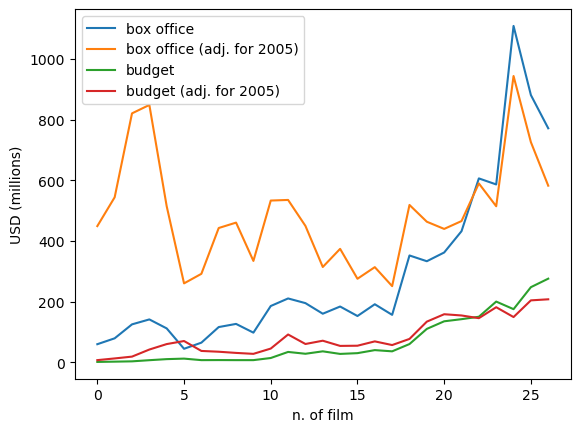

In [20]:
fig, ax = plt.subplots()

ax.plot(films_df.index, films_df['box_office'], label='box office')
ax.plot(films_df.index, films_df['box_office_adj'], label='box office (adj. for 2005)')
ax.plot(films_df.index, films_df['budget'], label='budget')
ax.plot(films_df.index, films_df['budget_adj'], label='budget (adj. for 2005)')
ax.set_xlabel('n. of film')
ax.set_ylabel('USD (millions)')
ax.legend()

plt.show()

We see that only in one case (*Casino Royale, 1967*) box office was lower than budget, albeit adjusted. Interestingly, this is one of two films not produced by *Eon*, the producer company of most films.


Now, let's plot net profits of films production.

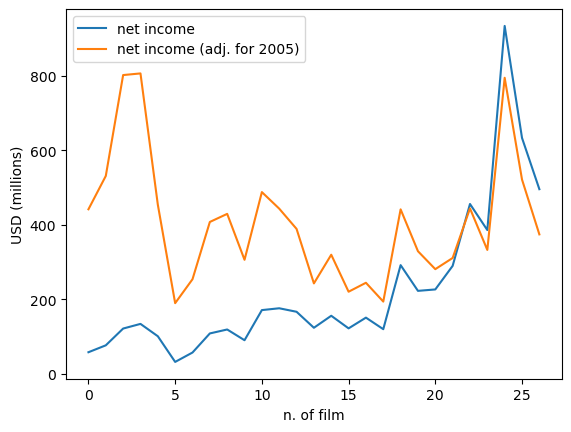

In [21]:
fig, ax = plt.subplots()


ax.plot(films_df.index, films_df['net_income'], label='net income')
ax.plot(films_df.index, films_df['net_income_adj'], label='net income (adj. for 2005)')
ax.set_xlabel('n. of film')
ax.set_ylabel('USD (millions)')
ax.legend()

plt.show()

Adjusted net income seems to be mean-centered, except for a couple outliers. Perhaps, they are even stationary, but further tests may be required.